# Basic exploratory data analysis (EDA) in R
+ Is the process of analyzing and visualizing the data to get a better understanding of the data and glean insight from it**** 
+ EDA is not a formal process with a strict set of rules
+ EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data

In [3]:
library(tidyverse, quietly = T) # metapackage of all tidyverse packages
library(forcats, quietly = T)
library(data.table,quietly = T)
library(dplyr, quietly = T)
library(corrplot, quietly = T)
library(e1071, quietly = T)
library(reshape, quietly = T)
library(ggplot2, quietly = T)
library(gridExtra, quietly = T)

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data <- fread("../input/hs-train/train.csv", header = T)
head(data)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
# Structure of data
dim(data)

[1] 1460   81

In [6]:
# List of features
str(data)

Classes ‘data.table’ and 'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Stor

In [7]:
# See basic summary for all features in the dataset
summary(data)

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

,NAs_count,features
,<int>,<fct>
PoolQC,1453,PoolQC
MiscFeature,1406,MiscFeature
Alley,1369,Alley
Fence,1179,Fence
FireplaceQu,690,FireplaceQu
LotFrontage,259,LotFrontage
GarageType,81,GarageType
GarageYrBlt,81,GarageYrBlt
GarageFinish,81,GarageFinish


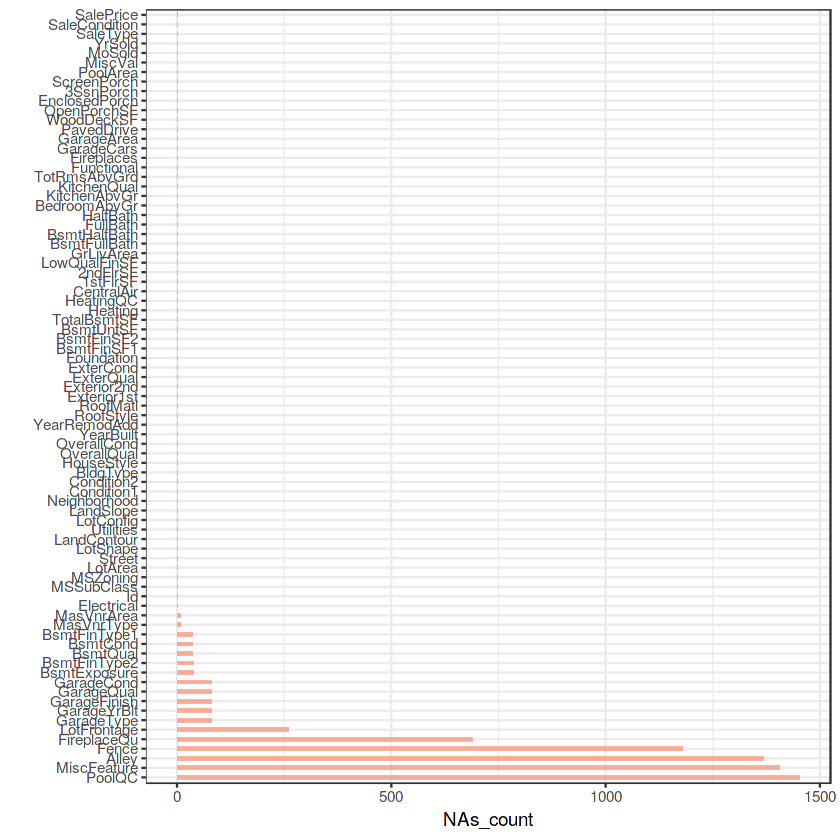

In [8]:
# count number of NAs in each columns
na <- as.data.frame(sapply(data, function(x) sum(is.na(x))))
colnames(na) <- c("NAs_count")
na <- na[order(-na$NAs_count), , drop = FALSE]
na$features <- rownames(na)
na$features <- factor(na$features, levels = na$features)
na


ggplot(na, aes(x=features, y=NAs_count)) +
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
 coord_flip() +
 xlab("") +
 theme_bw()

In [9]:
# select numerical and categorical variables
catg_names <- names(data)[which(sapply(data, is.character))] # using fread, not all variables were correctly assigned to integer/character -> this do not happen if you read data with read.csv()
catg_names <- c(catg_names, 'BedroomAbvGr', 'HalfBath', 'KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath', 'MSSubClass')
numeric_names <- names(data)[which(sapply(data, is.numeric))]
catg_names

# change character variables to factors
#data[,(catg_names) := lapply(.SD, as.factor), .SDcols = catg_names]
#data

[1] "MSZoning"      "Street"        "Alley"         "LotShape"     
 [5] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
 [9] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[13] "HouseStyle"    "RoofStyle"     "RoofMatl"      "Exterior1st"  
[17] "Exterior2nd"   "MasVnrType"    "ExterQual"     "ExterCond"    
[21] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[25] "BsmtFinType1"  "BsmtFinType2"  "Heating"       "HeatingQC"    
[29] "CentralAir"    "Electrical"    "KitchenQual"   "Functional"   
[33] "FireplaceQu"   "GarageType"    "GarageFinish"  "GarageQual"   
[37] "GarageCond"    "PavedDrive"    "PoolQC"        "Fence"        
[41] "MiscFeature"   "SaleType"      "SaleCondition" "BedroomAbvGr" 
[45] "HalfBath"      "KitchenAbvGr"  "BsmtFullBath"  "BsmtHalfBath" 
[49] "MSSubClass"

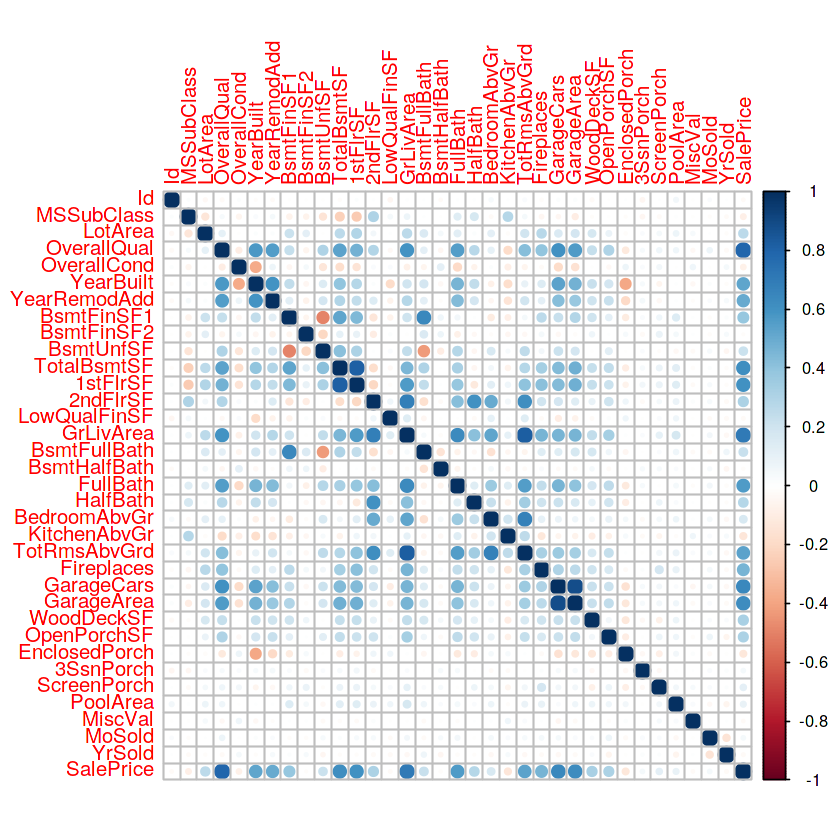

In [10]:
# create correlation plots for all numerical features
data_numeric <- as.data.frame(data[,.SD,.SDcols = numeric_names])
data_numeric <- data_numeric[ ,colSums(is.na(data_numeric)) == 0] # to make it easiear, all columns with NAs are removed
#cor(data_numeric)
#data_numeric
corrplot(cor(data_numeric), method="circle")

Warning message:
“Removed 259 rows containing non-finite values (stat_density).”


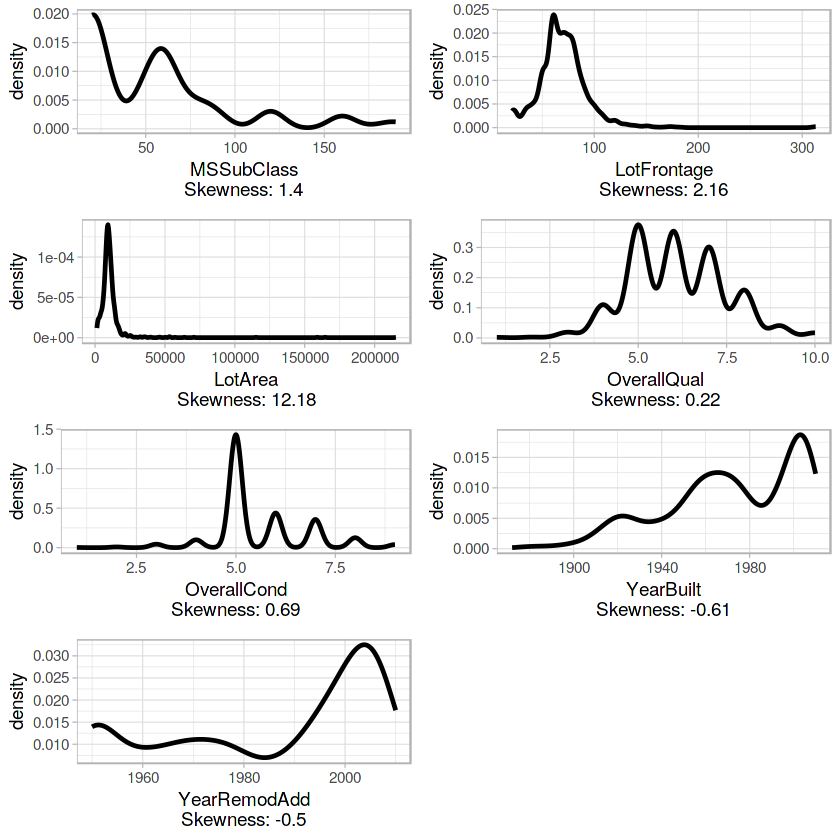

In [11]:
# following code is adapted from: https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r/report
data_numeric <- data[,.SD,.SDcols = numeric_names]

# function to do several plots
doPlots <- function(data_in, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

# function to create density plots -> for continuous variables
plotDen <- function(data_in, i){
  data <- data.frame(x=data_in[[i]], SalePrice = data_in$SalePrice)
  p <- ggplot(data= data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) + theme_light() 
  return(p)
   
}

doPlots(data_numeric, fun = plotDen, ii = 2:8, ncol = 2)

In [12]:
# function to create histograms -> for categorical variables
plotHist <- function(data_in, i) {
  data <- data.frame(x=data_in[[i]])
  p <- ggplot(data=data, aes(x=factor(x))) + stat_count() + xlab(colnames(data_in)[i]) + theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}

data_catg <- data[,.SD, .SDcols = catg_names]

doPlots(data_catg, fun = plotHist, ii = 1:4, ncol = 2)
